In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/PFE

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from prep_dataset import *
from models.GCN_model import *
from models.GIN_model import *
from train import *

In [0]:
# Setting up the default data type
use_cuda = torch.cuda.is_available()
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
device = torch.device('cuda') if use_cuda else torch.device('cpu')
dtype = torch.float32
torch.set_default_tensor_type(FloatTensor)

In [0]:
ds_name = "PTC_MR"
batch_size = 32
n_folds = 3
folded_train_data, folded_test_data, info = get_folded_data(ds_name, batch_size, n_folds)

In [0]:
learning_rate = 0.0001
num_epochs = 500
n_features = info[0]
hidden_dim = 10
n_classes = info[1]
dropout = 0
n_gnn_layers = 6 
n_mlp_layers = 6

Fold no. 1, epoch [1/500], Loss: 31.3889, train_acc: 6.0, valid_acc: 3.0
Fold no. 1, epoch [2/500], Loss: 30.7708, train_acc: 6.0, valid_acc: 4.0
Fold no. 1, epoch [3/500], Loss: 26.5276, train_acc: 8.0, valid_acc: 5.0
Fold no. 1, epoch [4/500], Loss: 35.4958, train_acc: 7.0, valid_acc: 6.0
Fold no. 1, epoch [5/500], Loss: 27.5524, train_acc: 8.0, valid_acc: 7.0
Fold no. 1, epoch [6/500], Loss: 22.8053, train_acc: 8.0, valid_acc: 8.0
Fold no. 1, epoch [7/500], Loss: 21.1696, train_acc: 10.0, valid_acc: 8.0
Fold no. 1, epoch [8/500], Loss: 18.9855, train_acc: 10.0, valid_acc: 9.0
Fold no. 1, epoch [9/500], Loss: 22.4986, train_acc: 10.0, valid_acc: 8.0
Fold no. 1, epoch [10/500], Loss: 25.4758, train_acc: 11.0, valid_acc: 8.0
Fold no. 1, epoch [11/500], Loss: 22.6171, train_acc: 11.0, valid_acc: 11.0
Fold no. 1, epoch [12/500], Loss: 30.4787, train_acc: 10.0, valid_acc: 10.0
Fold no. 1, epoch [13/500], Loss: 25.0327, train_acc: 12.0, valid_acc: 9.0
Fold no. 1, epoch [14/500], Loss: 17.1

No handles with labels found to put in legend.


Fold no. 1, epoch [500/500], Loss: 0.0283, train_acc: 93.0, valid_acc: 56.0


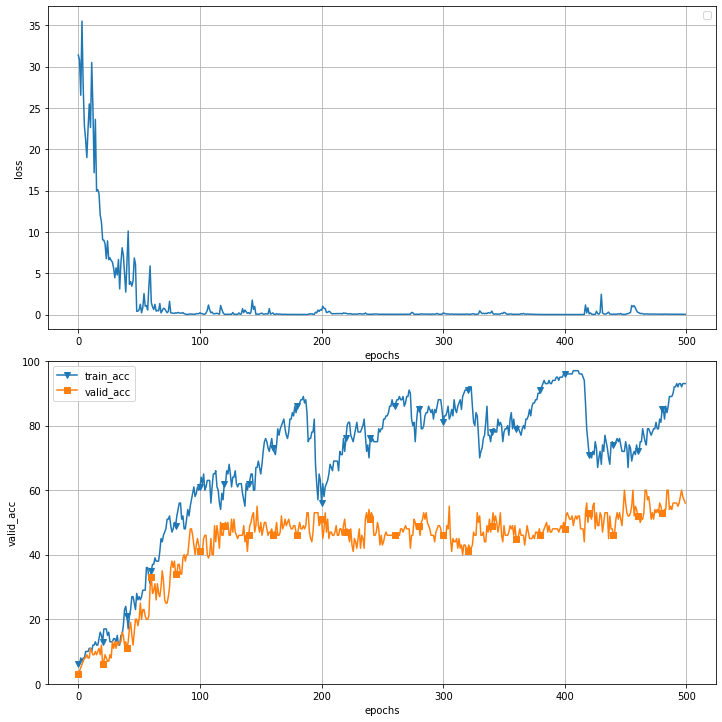

Fold no. 2, epoch [1/500], Loss: 0.0226, train_acc: 68.0, valid_acc: 72.0
Fold no. 2, epoch [2/500], Loss: 0.0499, train_acc: 65.0, valid_acc: 73.0
Fold no. 2, epoch [3/500], Loss: 0.0659, train_acc: 65.0, valid_acc: 66.0
Fold no. 2, epoch [4/500], Loss: 0.0643, train_acc: 69.0, valid_acc: 66.0
Fold no. 2, epoch [5/500], Loss: 0.3076, train_acc: 62.0, valid_acc: 68.0
Fold no. 2, epoch [6/500], Loss: 0.3349, train_acc: 62.0, valid_acc: 66.0
Fold no. 2, epoch [7/500], Loss: 0.0297, train_acc: 61.0, valid_acc: 59.0
Fold no. 2, epoch [8/500], Loss: 0.0509, train_acc: 57.0, valid_acc: 60.0
Fold no. 2, epoch [9/500], Loss: 0.0676, train_acc: 63.0, valid_acc: 60.0
Fold no. 2, epoch [10/500], Loss: 0.8030, train_acc: 64.0, valid_acc: 58.0
Fold no. 2, epoch [11/500], Loss: 0.5786, train_acc: 60.0, valid_acc: 66.0
Fold no. 2, epoch [12/500], Loss: 2.2964, train_acc: 61.0, valid_acc: 63.0
Fold no. 2, epoch [13/500], Loss: 0.2862, train_acc: 58.0, valid_acc: 64.0
Fold no. 2, epoch [14/500], Loss: 

No handles with labels found to put in legend.


Fold no. 2, epoch [500/500], Loss: 0.2006, train_acc: 65.0, valid_acc: 52.0


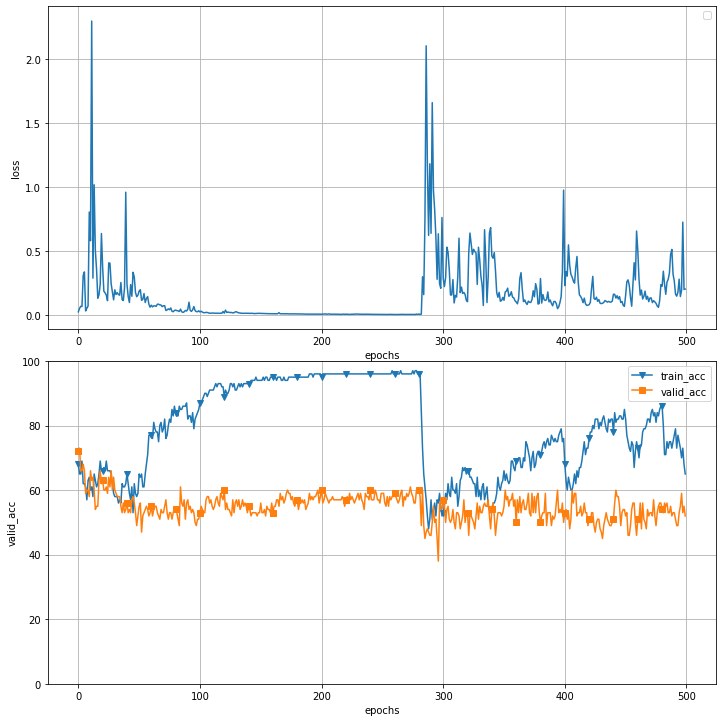

Fold no. 3, epoch [1/500], Loss: 1.0983, train_acc: 55.0, valid_acc: 53.0
Fold no. 3, epoch [2/500], Loss: 1.2714, train_acc: 51.0, valid_acc: 57.0
Fold no. 3, epoch [3/500], Loss: 1.3643, train_acc: 57.0, valid_acc: 57.0
Fold no. 3, epoch [4/500], Loss: 0.4999, train_acc: 50.0, valid_acc: 58.0
Fold no. 3, epoch [5/500], Loss: 0.8803, train_acc: 50.0, valid_acc: 53.0
Fold no. 3, epoch [6/500], Loss: 0.5378, train_acc: 59.0, valid_acc: 63.0
Fold no. 3, epoch [7/500], Loss: 0.8897, train_acc: 54.0, valid_acc: 63.0
Fold no. 3, epoch [8/500], Loss: 1.9762, train_acc: 51.0, valid_acc: 62.0
Fold no. 3, epoch [9/500], Loss: 0.6184, train_acc: 55.0, valid_acc: 66.0
Fold no. 3, epoch [10/500], Loss: 0.6514, train_acc: 54.0, valid_acc: 64.0
Fold no. 3, epoch [11/500], Loss: 1.1574, train_acc: 54.0, valid_acc: 67.0
Fold no. 3, epoch [12/500], Loss: 0.7810, train_acc: 57.0, valid_acc: 68.0
Fold no. 3, epoch [13/500], Loss: 0.6928, train_acc: 50.0, valid_acc: 68.0
Fold no. 3, epoch [14/500], Loss: 

No handles with labels found to put in legend.


Fold no. 3, epoch [500/500], Loss: 0.0676, train_acc: 81.0, valid_acc: 63.0


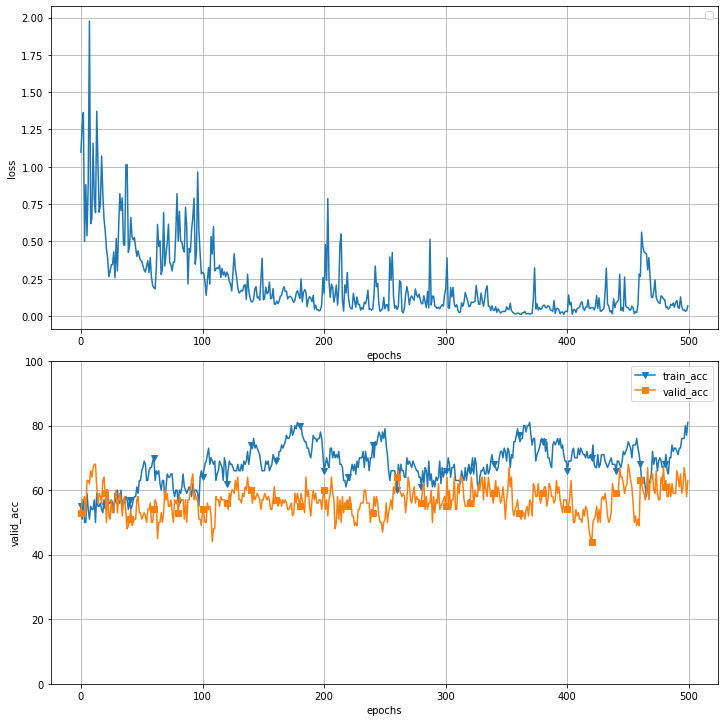

Average training accuracy across the 3 folds: 79.7
Average validation accuracy across the 3 folds: 57.0


In [26]:
model = GIN(n_gnn_layers, n_mlp_layers, input_dim=n_features, hidden_dim=hidden_dim, 
            output_dim=n_classes, learn_eps=False, dropout=dropout, attention=False)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_GNN(model, folded_train_data, folded_test_data, optimizer, criterion, num_epochs=num_epochs, device=device)